In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv('olympics_medals_country_wise.csv',sep=",", decimal=",")
data.head(3)

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0.0,0,2,2.0,0,0,0,0,0,15,0.0,0,2,2.0
1,Algeria,(ALG),14,5.0,4,8,17.0,3,0,0,0,0,17,5.0,4,8,17.0
2,Argentina,(ARG),25,21.0,26,30,77.0,20,0,0,0,0,45,21.0,26,30,77.0


OK I would have liked to have dates of these medals. But let's work with totals

____

## The beginning. 
Understanding the dataset, its columns and information.

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   countries              156 non-null    object 
 1   ioc_code               156 non-null    object 
 2   summer_participations  156 non-null    int64  
 3   summer_gold            156 non-null    float64
 4   summer_silver          156 non-null    int64  
 5   summer_bronze          156 non-null    int64  
 6   summer_total           156 non-null    float64
 7   winter_participations  156 non-null    int64  
 8   winter_gold            156 non-null    int64  
 9   winter_silver          156 non-null    int64  
 10  winter_bronze          156 non-null    int64  
 11  winter_total           156 non-null    int64  
 12  total_participation    156 non-null    int64  
 13  total_gold             156 non-null    float64
 14  total_silver           156 non-null    int64  
 15  total_

In [85]:
data.shape

(156, 17)

### Dataset health

In [87]:
# let's check the duplicated
data.duplicated().sum()

0

In [88]:
# let's check the null
data.isnull().sum()

countries                0
ioc_code                 0
summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver             0
total_bronze             0
total_total              0
dtype: int64

A too perfect dataset.

### Let's start with Summer info

In [97]:
summer_data = data.loc[:, ['countries','summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total']]

In [98]:
# Let's make the data types more correct 
type_str_list = ['summer_gold','summer_total']
for column in type_str_list: data[column] = data[column].astype(int)

summer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   summer_participations  156 non-null    int64 
 2   summer_gold            156 non-null    int32 
 3   summer_silver          156 non-null    int64 
 4   summer_bronze          156 non-null    int64 
 5   summer_total           156 non-null    int32 
dtypes: int32(2), int64(3), object(1)
memory usage: 6.2+ KB


In [145]:
# Which countries have the most participants?
summer_data.sort_values('summer_participations',ascending=False)

,countries,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total
129,Switzerland,29,53,79,74,206
52,Greece,29,35,45,41,121
43,France,29,223,251,277,751
51,Great Britain,29,284,318,314,916
144,United States,28,1,831,738,2
...,...,...,...,...,...,...
17,British West Indies,1,0,0,2,2
113,ROC,1,20,28,23,71
111,Unified Team,1,45,38,29,112
154,Independent Olympic Participants,1,0,1,2,3


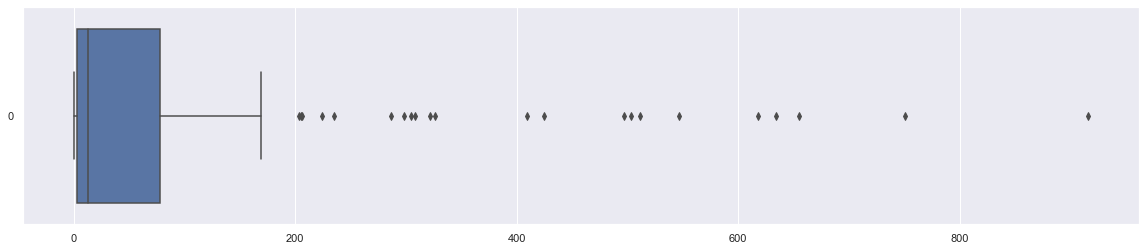

In [159]:
# Let's understand the Summer winners. >> summer_total

sns.set(rc={"figure.figsize":(20, 4)})
sns.boxplot(data=summer_data.summer_total, orient="h");

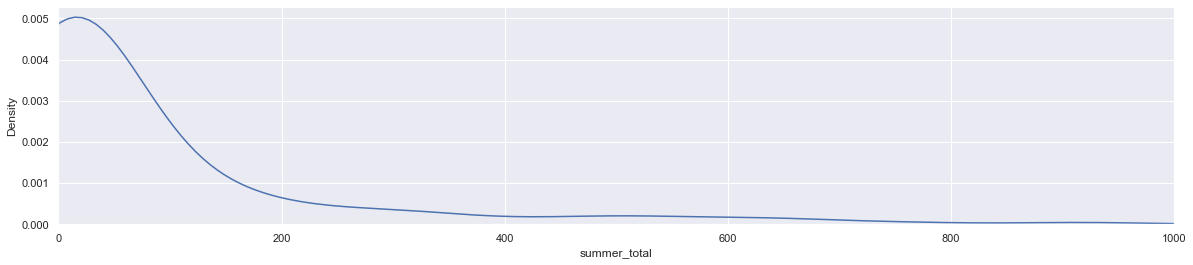

In [163]:
sns.kdeplot(data=summer_data.summer_total)
plt.xlim(0,1000)
plt.show()

In [160]:
summer_data.sort_values('summer_total',ascending=False)

,countries,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total
51,Great Britain,29,284,318,314,916
43,France,29,223,251,277,751
46,Germany,17,201,207,247,655
24,China,11,262,199,173,634
66,Italy,28,217,188,213,618
...,...,...,...,...,...,...
38,Eritrea,6,0,0,1,1
34,Djibouti,9,0,0,1,1
116,Samoa,10,0,1,0,1
112,Olympic Athletes from Russia,0,0,0,0,0


In [92]:
# Let's see the relation between number of participants and medals won.

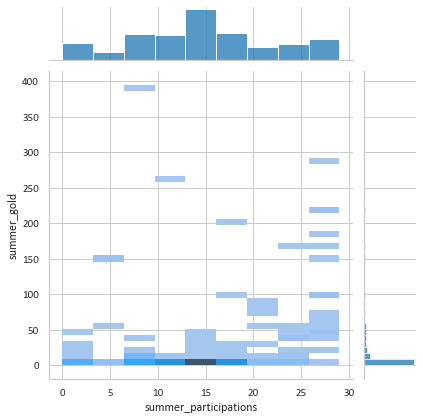

In [138]:
sns.jointplot(data=summer_data, x="summer_participations", y="summer_gold", kind="hist")

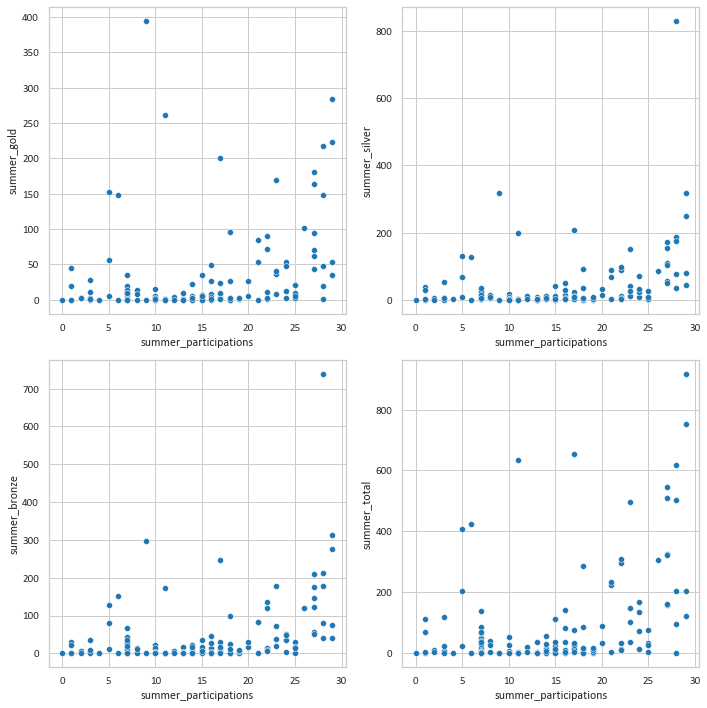

In [132]:
f, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot( data=summer_data, x="summer_participations", y="summer_gold", ax=axs[0,0])
sns.scatterplot( data=summer_data, x="summer_participations", y="summer_silver", ax=axs[0,1])
sns.scatterplot( data=summer_data, x="summer_participations", y="summer_bronze", ax=axs[1,0])
sns.scatterplot( data=summer_data, x="summer_participations", y="summer_total", ax=axs[1,1])
f.tight_layout()


I fail to see any connection.

I'll continue with the winter games. But I want to think about how the variables might be related, can you help me? 

To be continued